<a href="https://colab.research.google.com/github/pacorod1998/Forecasting-Methods-for-Natural-Gas-Consumption/blob/main/Forecasting_Methods_for_Natural_Gas_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Forecasting Methods for Natural Gas Consumption**

The natural gas industry relies on accurate forecasts for
efficient supply chain management. Billion Cubic Feet (BCF)
is a crucial measure in the industry for monitoring gas
consumption.

**Objetives:**
*  Evaluate and compare different forecasting methods for Billion
Cubic Feet consumption.
*   Determine the most effective model for future predictions over a
24-month horizon.
*   Provide actionable insights and recommendations based on the
forecast results.


**Variables Used:**

* **Billion Cubic Feet (BCF):**
  Measure of natural gas consumption.
  Essential for understanding the overall usage and demand within the industry.


* **Price:**
Natural gas price per unit.
Reflects market conditions and influences consumption patterns.

* **Unemployment Rate:**
Economic indicator.
Represents the percentage of the labor force that is unemployed. - Can affect industrial and residential consumption of natural gas.

**Time Period:**
* Data spans from 2000-01-01 to 2024-04-01.
* Allows for analysis of long-term trends and seasonal patterns.

**Monthly data points:**
* Ensures a detailed and granular view of consumption patterns.




###**Mounting Google Drive**

In [1]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [2]:
import os

path = "/content/gdrive/MyDrive/BANA6350/Data"

os.chdir(path)

In [3]:
import matplotlib.pyplot as plt

# Optional plot parameters
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [20.0, 10.0]
plt.rcParams['font.size'] = 18


###**Loading Data from CSV**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Final.csv', header=0, parse_dates=True, index_col=0)
df

# Checking the datatype of the Index and data columns

df.dtypes          # shows Passengers data type is int64

type(df.index)     # pandas.core.indexes.datetimes.DatetimeIndex

# Manually changing index frequency

df    # here check the dates, -- they are showing the first dates of every month e.g., 1949-05-01

df.index.freq = 'MS'     # to ensure we have a monthly Frequency we used MS = Month Start (e.g., 1/1/2020), M = Month End (e.g., 1/31/2020), YS = Year Start (1/1/2020) , Y = Year End (e.g., 12/31/2020), similarly Q, QS etc.
df

df.info()    # now check here they are showing Freq = MS


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2000-01-01 to 2024-04-01
Freq: MS
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Billion Cubic Feet  292 non-null    float64
 1   Price               292 non-null    float64
 2   Unemployment Rate   292 non-null    float64
dtypes: float64(3)
memory usage: 9.1 KB


###**Time Series Regression : One Dependent and Two Independent Variables**

Time Series Regression predicts BCF consumption using historical data and economic indicators like Price and Unemployment Rate. It's simple and interpretable but may not capture complex patterns and seasonality.

In [5]:
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ensure that the index is of datetime type and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.index.freq = 'MS'  # Set the frequency to Month Start

# Check for and handle missing values
df = df.dropna(subset=['Billion Cubic Feet', 'Price', 'Unemployment Rate'])

In [6]:
# Define dependent and independent variables
Y = df['Billion Cubic Feet']
X = df[['Price', 'Unemployment Rate']]
X = sm.add_constant(X)

In [7]:
# Fit the OLS model
model = sm.OLS(Y, X, missing='drop')  # Ensure OLS() is capitalized
fit = model.fit()

# Display the summary of the model
summary = fit.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:     Billion Cubic Feet   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           4.37e-08
Time:                        17:31:05   Log-Likelihood:                -2208.7
No. Observations:                 292   AIC:                             4423.
Df Residuals:                     289   BIC:                             4434.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2744.5039    106.91

* Overall, the OLS model suggests that both Price and Unemployment Rate have a negative impact on BCF consumption, but the model explains only a small portion of the variance in BCF consumption.

* With an R-squared value of only 0.111, the model explains just a small portion of the variance in BCF consumption, indicating that important factors influencing consumption may be missing.

* The Durbin-Watson statistic of 0.452 indicates potential positive autocorrelation in the residuals, which can undermine the reliability of the model's predictions.

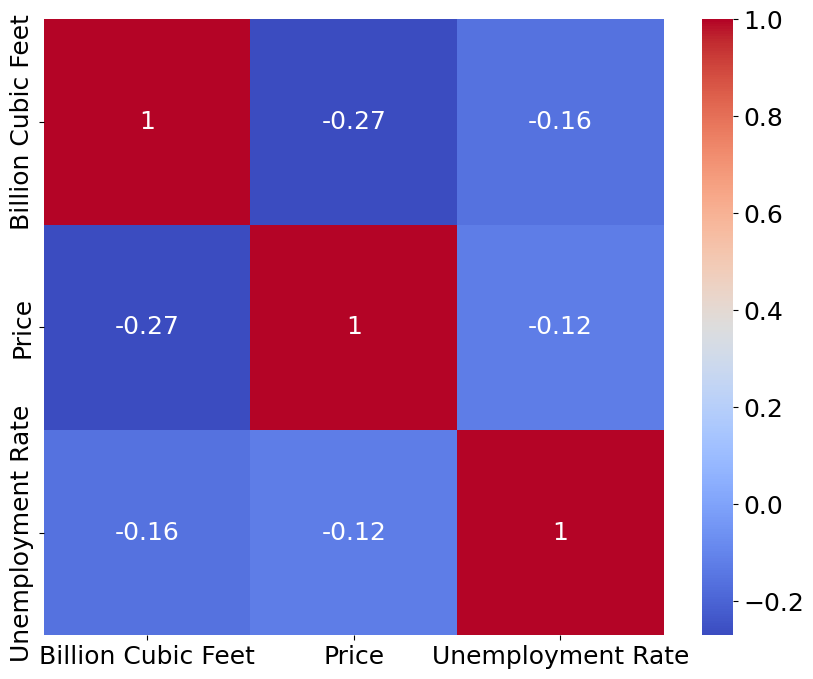

In [8]:
# Gráficos de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Billion Cubic Feet', 'Price', 'Unemployment Rate']].corr(), annot=True, cmap='coolwarm')
plt.show()

**Billion Cubic Feet & Price:**
* Correlation coefficient: -0.27
* Indicates a moderate negative correlation.

**Billion Cubic Feet & Unemployment Rate:**
* Correlation coefficient: -0.16
* Indicates a weak negative correlation.

**Price & Unemployment Rate:**
* Correlation coefficient: -0.12
* Indicates a weak negative correlation.


In [9]:
!pip install --upgrade sktime
!pip install --upgrade polars



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.9/31.9 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2


In [10]:
# Now check the accuracy measures within the model data

# get the custom accuracy function:


def accuracy(y_test,y_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import r2_score
    R_sq= r2_score(y_test,y_pred)
    RMSE = rmse(y_test,y_pred)
    RMSPE = rmspe(y_test,y_pred)
    MAE = meanabs(y_test,y_pred)
    MSE =  mse(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    print('R-SQ : %f' % R_sq, ' RMSE : %f' % RMSE, ' RMSPE : %f' % RMSPE, ' MAE : %f' % MAE, ' MSE : %f' % MSE , ' MAPE : %f' % MAPE)



accuracy(Y,fit.fittedvalues)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


R-SQ : 0.110659  RMSE : 466.391444  RMSPE : 2.205344  MAE : 388.319842  MSE : 217520.978935  MAPE : 0.184279


,const,Price,Unemployment Rate
2024-04-01,1.0,1.786818,3.5
2024-05-01,1.0,NaN,NaN
2024-06-01,1.0,NaN,NaN
2024-07-01,1.0,NaN,NaN
2024-08-01,1.0,NaN,NaN
2024-09-01,1.0,NaN,NaN
2024-10-01,1.0,NaN,NaN
2024-11-01,1.0,NaN,NaN
2024-12-01,1.0,NaN,NaN
2025-01-01,1.0,NaN,NaN


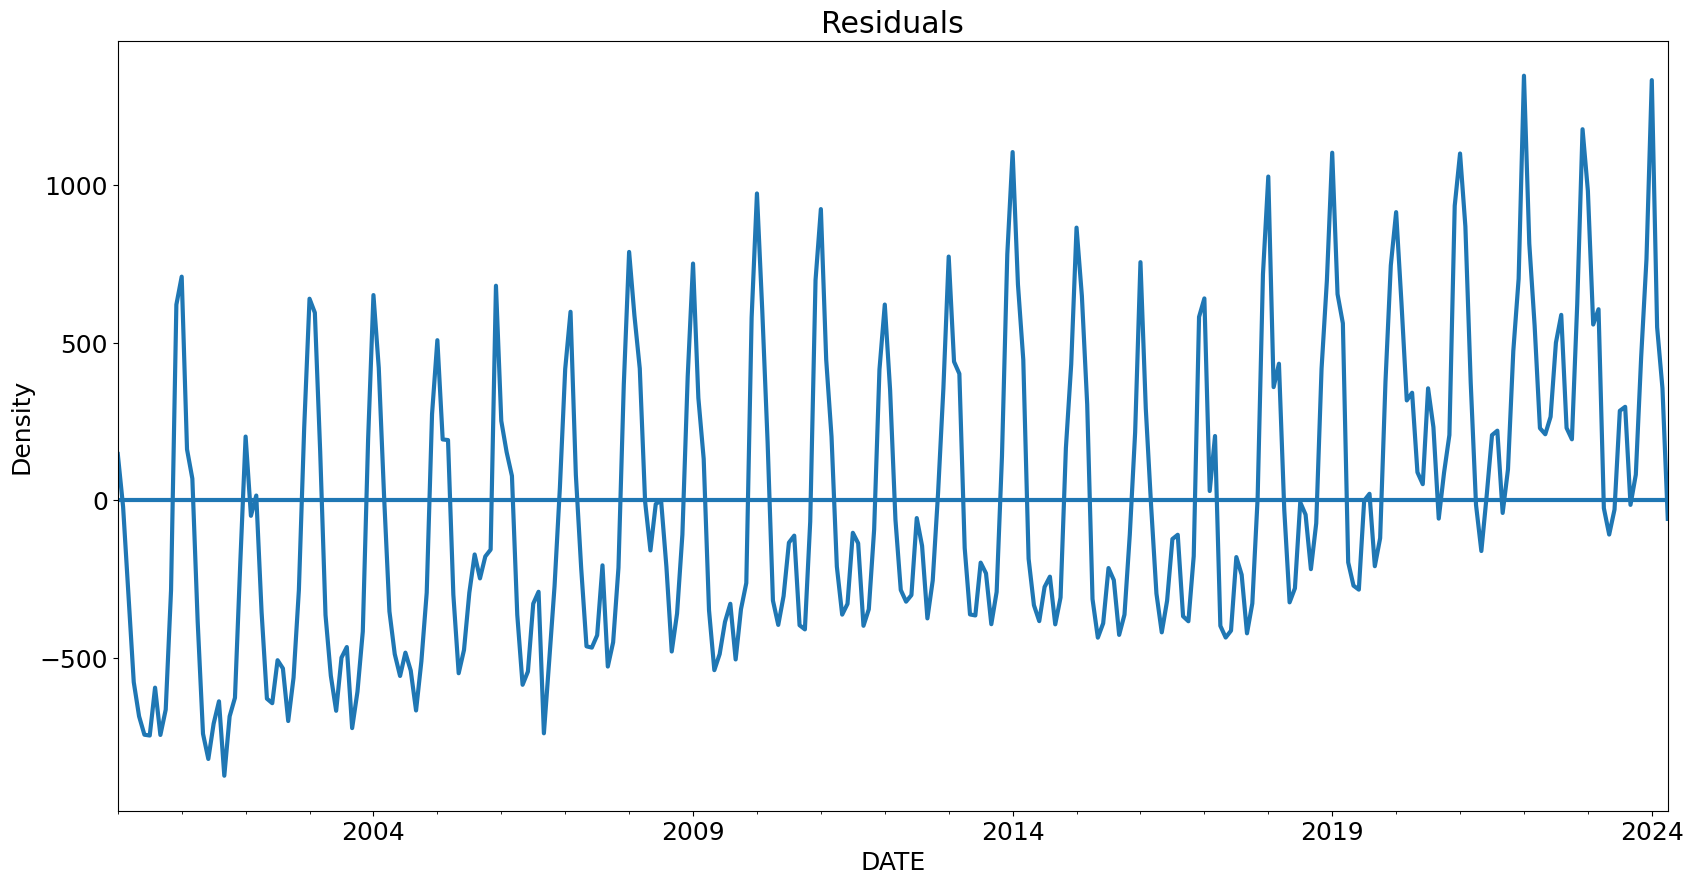

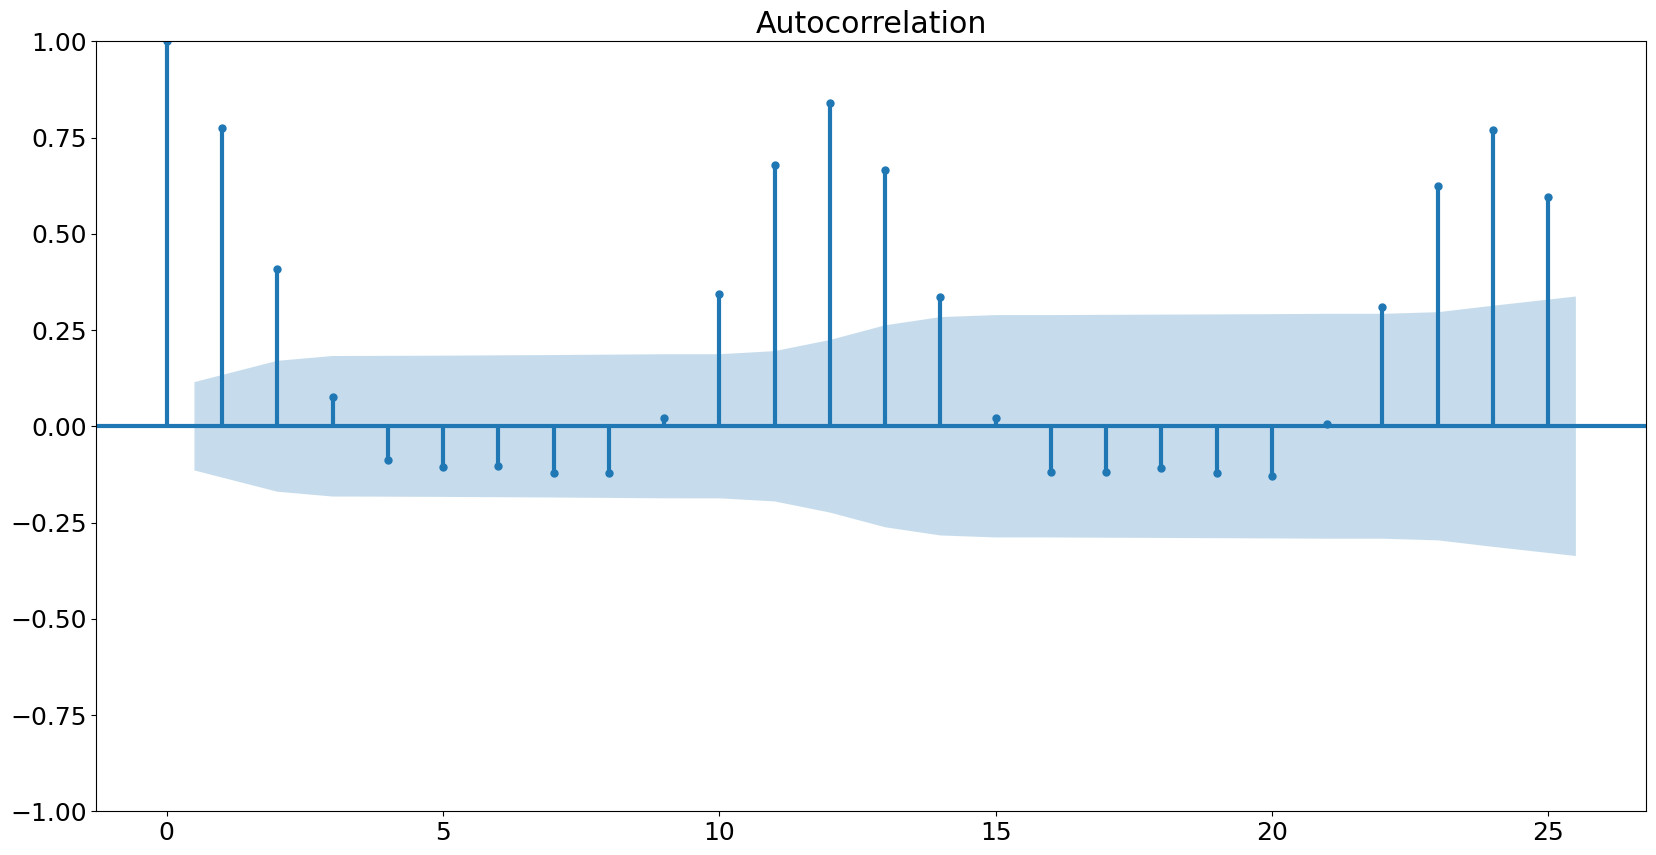

In [11]:
fit.resid.plot(title="Residuals")
sns.histplot(fit.resid, kde=True, stat="density", linewidth=0)
plot_acf(fit.resid)

X.tail(6)

horizon = pd.date_range(start='2024-04-01', periods=24, freq='MS')
fcast=X.reindex(horizon )

fcast

fcast['const']=1.0                                                          # adding the constant column with 1.0 values
fcast


In [12]:
# We now have the future index created for Income and Savings, with empty values, so we need to populate them with assumed values
        # We will assume the future 24 months will have 0 to 1 income growth rates  (just as an example, you need to assume whatever you feel reasonable)
        # We will assume the future 24 months will have 0 to 1 savings growth rates (just as an example, you need to assume whatever you feel reasonable)

import random


# using a for loop to populate future values for Income and Savings using some random values for demonstration purposes

fcast['Price'] = [random.uniform(0,1) for i in range(len(fcast))]     # here we are assuming a growth of 0 to 1 percent each quarter over the near future i.e., input values for X's
fcast

fcast['Unemployment Rate'] = [random.uniform(0,1) for i in range(len(fcast))]     # here we are assuming a growth of 0 to 1 percent each quarter over the near future i.e., input values for X's
fcast

,const,Price,Unemployment Rate
2024-04-01,1.0,0.134431,0.824250
2024-05-01,1.0,0.745896,0.294279
2024-06-01,1.0,0.746458,0.740366
2024-07-01,1.0,0.142452,0.128389
2024-08-01,1.0,0.802768,0.031840
2024-09-01,1.0,0.452150,0.630716
2024-10-01,1.0,0.255992,0.834675
2024-11-01,1.0,0.791823,0.379051
2024-12-01,1.0,0.358923,0.453778
2025-01-01,1.0,0.407483,0.427914


In [13]:
# Now predict the future : Note: this prediction is highly dependent on what future values for Income or X's you have assigned
# since the future value of Income or y's is just a linear function of yt = b0 + b1 xt + et

mean_pred=fit.predict(fcast)
mean_pred

,0
2024-04-01,2695.182847
2024-05-01,2680.136554
2024-06-01,2658.280713
2024-07-01,2728.680218
2024-08-01,2689.162176
2024-09-01,2683.361949
2024-10-01,2686.528535
2024-11-01,2672.913295
2024-12-01,2698.262145
2025-01-01,2696.273605


In [14]:
predictions = fit.get_prediction(fcast)
prediction_intervals = predictions.summary_frame(alpha=0.05)
prediction_intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2024-04-01,2695.182847,96.637393,2504.980508,2885.385186,1753.076278,3637.289417
2024-05-01,2680.136554,97.870441,2487.507323,2872.765785,1737.537021,3622.736087
2024-06-01,2658.280713,92.719740,2475.789123,2840.772303,1717.700552,3598.860874
2024-07-01,2728.680218,104.334020,2523.329328,2934.031109,1783.398860,3673.961577
2024-08-01,2689.162176,100.552999,2491.253117,2887.071235,1745.469506,3632.854846
2024-09-01,2683.361949,96.225976,2493.969365,2872.754534,1741.418527,3625.305371
2024-10-01,2686.528535,95.524811,2498.515987,2874.541083,1744.861621,3628.195449
2024-11-01,2672.913295,96.547292,2482.888293,2862.938297,1730.842512,3614.984078
2024-12-01,2698.262145,98.951474,2503.505216,2893.019074,1755.225497,3641.298794
2025-01-01,2696.273605,98.868215,2501.680547,2890.866663,1753.270785,3639.276424


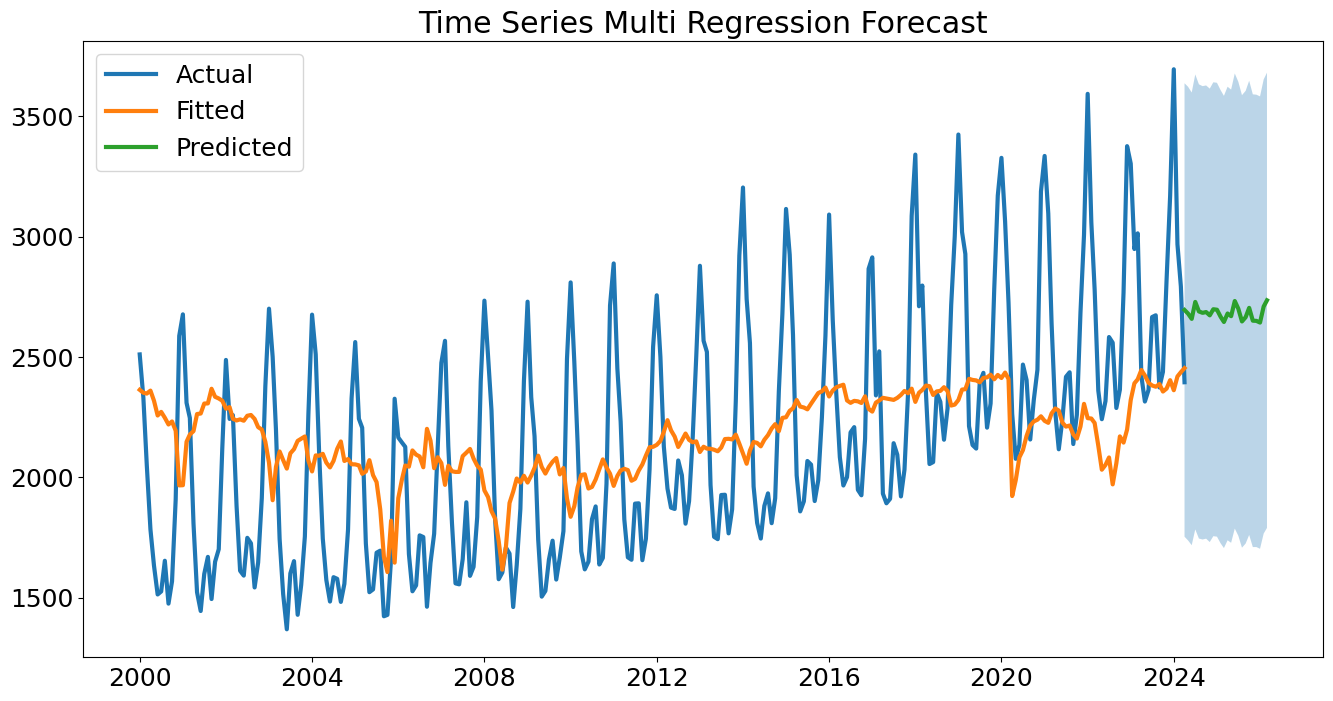

In [15]:
# Now plot the Prediction with confidence intervals

plt.figure(figsize=(16,8))
plt.plot(Y.index, Y, label='Actual')
plt.plot(Y.index, fit.fittedvalues, label='Fitted')
plt.plot(horizon, mean_pred, label='Predicted')
plt.fill_between(horizon, prediction_intervals['obs_ci_lower'], prediction_intervals['obs_ci_upper'], alpha=0.3)
plt.title('Time Series Multi Regression Forecast')
plt.legend()
plt.show()


* Limited Predictive Power: The forecasted values appear relatively flat, suggesting that the model may not effectively capture the underlying patterns and dynamics of BCF consumption over an extended period.

* Better Handling of Time Series Data: ARIMA and SARIMA models are specifically designed to handle time series data, capturing both trend and seasonality components more effectively.

* While the time series regression model provides a basic understanding of the relationship between BCF consumption and economic variables, it falls short in terms of predictive accuracy and reliability.

###**ARIMA and SARIMA**

ARIMA and SARIMA models consider trends and seasonality in BCF consumption. They are robust for short-term forecasting but require the data to be stationary and parameter selection can be complex.


<Axes: title={'center': 'Billion Cubic Feet'}, xlabel='DATE'>

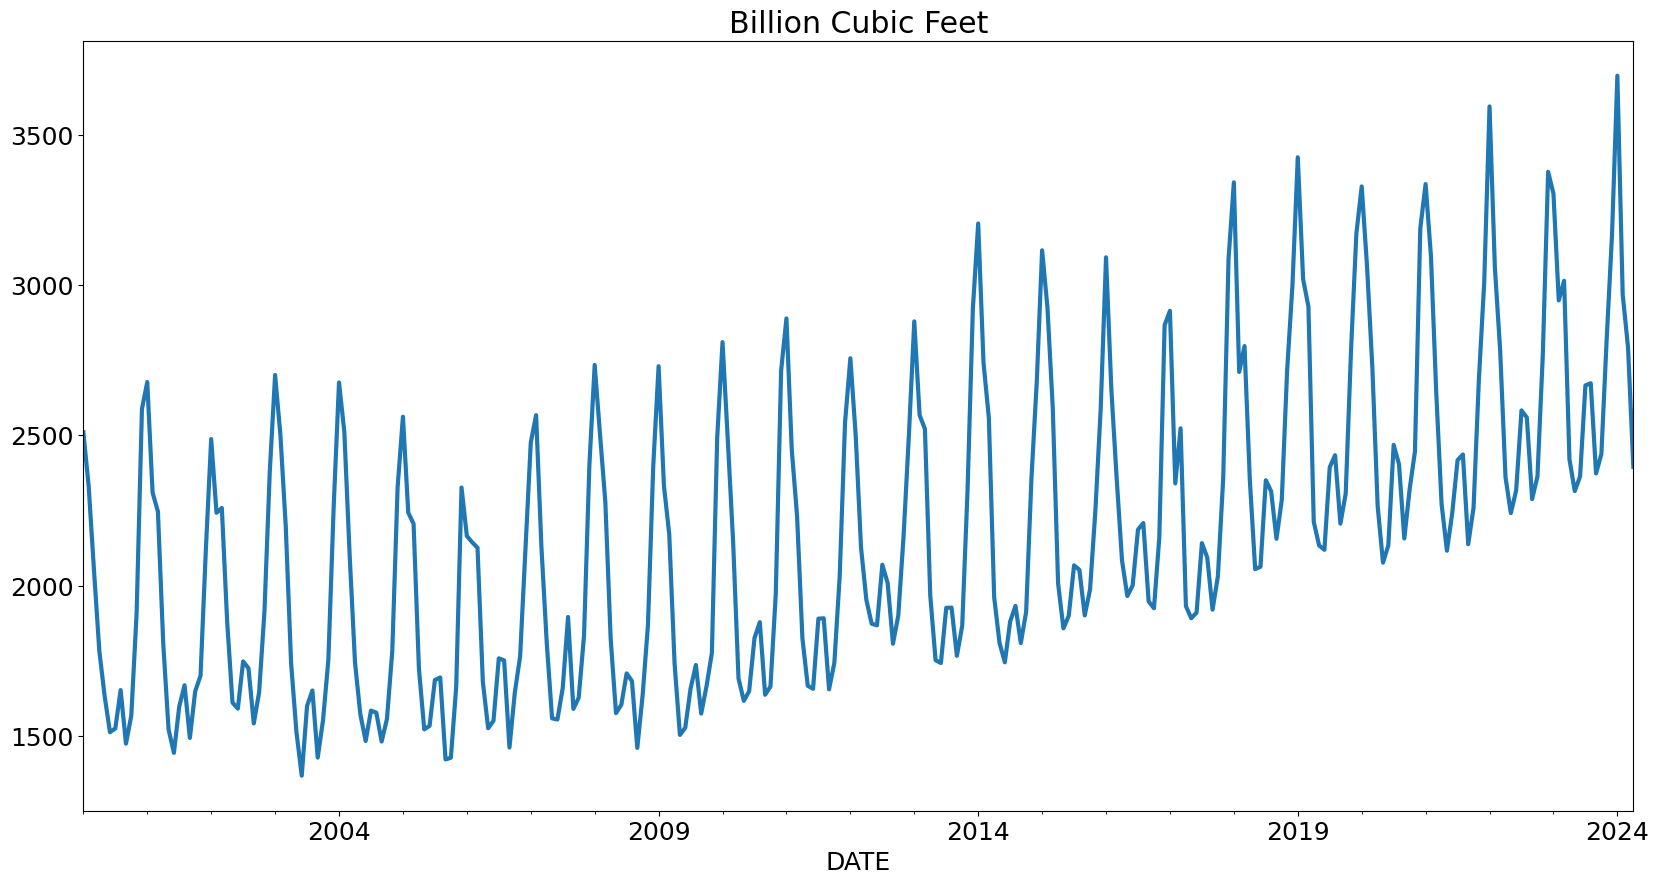

In [16]:
import os
import pandas as pd

# Asegúrate de ajustar la ruta según sea necesario
# os.chdir('/Users/paco/Desktop/Summer 2024/Forecasting Methods/Data')

df = pd.read_csv('Final.csv', index_col=0, parse_dates=True)
df.fillna(0, inplace=True)  # Usar inplace=True para modificar el DataFrame en su lugar
df.index.freq = 'MS'

# Plot de los datos
df['Billion Cubic Feet'].plot(title='Billion Cubic Feet')

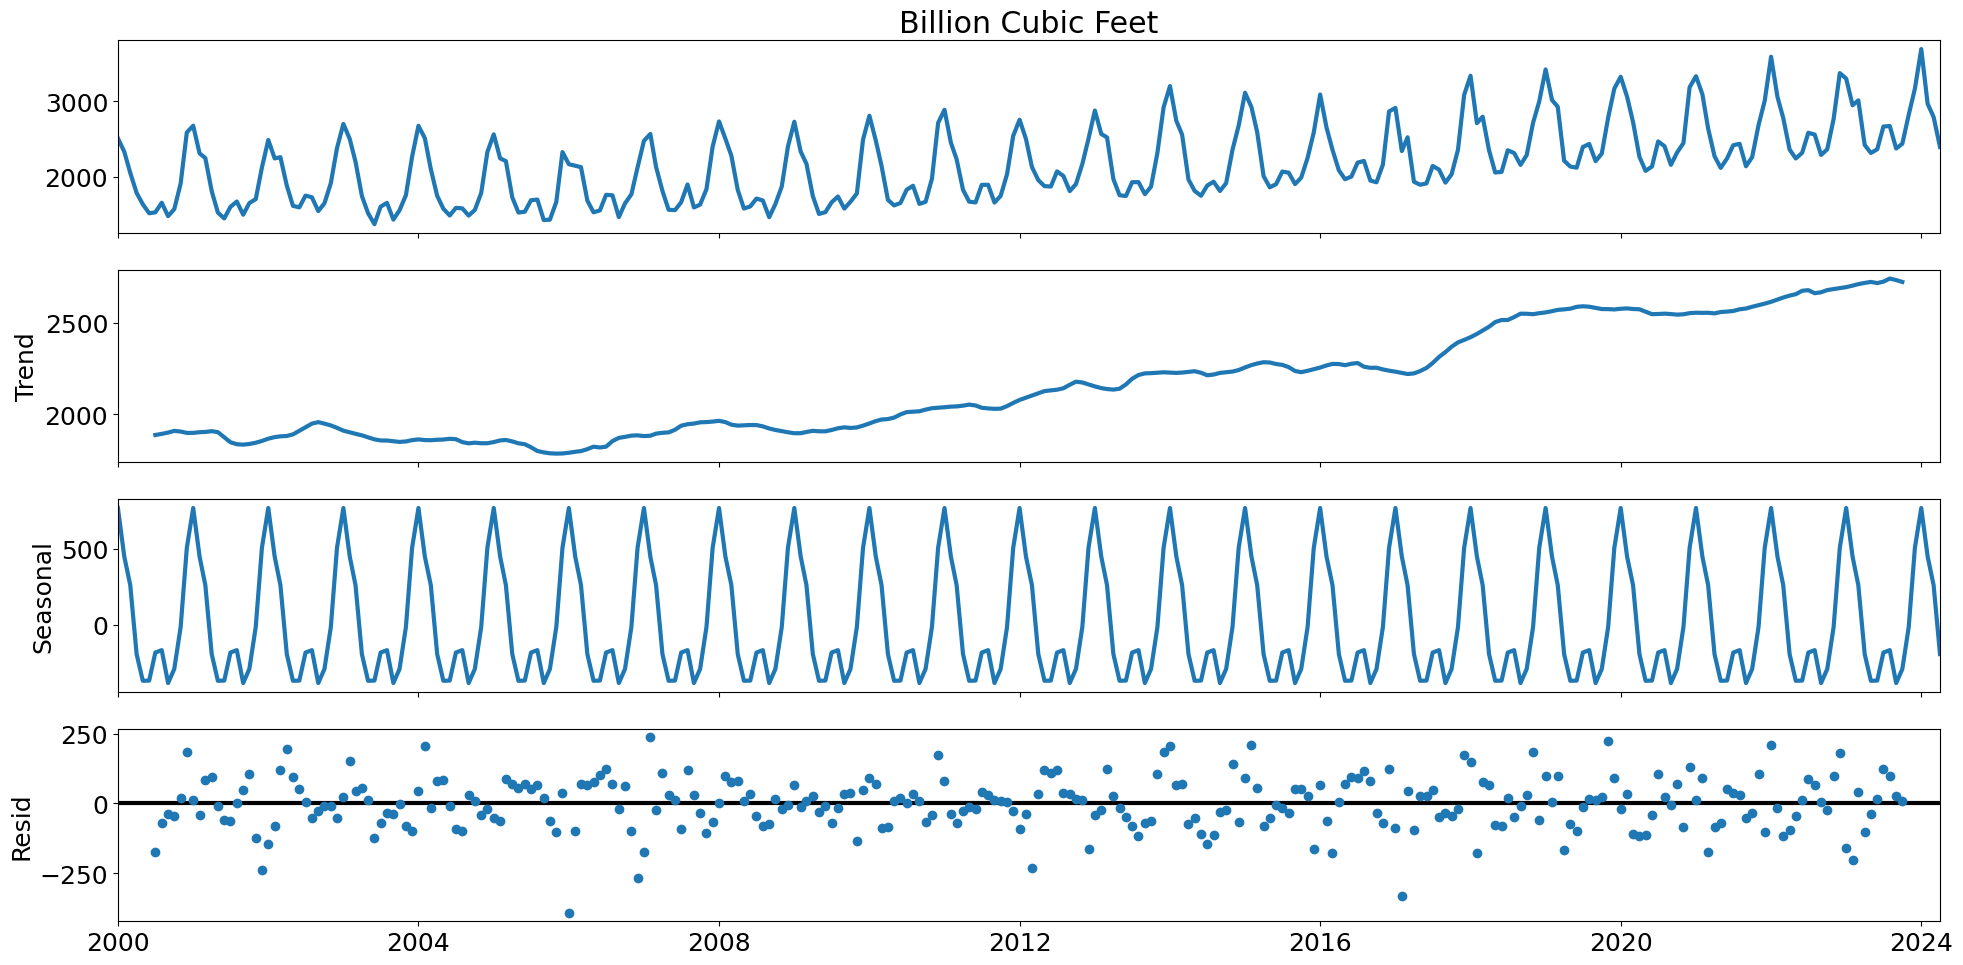

In [17]:
y = df['Billion Cubic Feet']

# Descomposición estacional
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


decomposition = seasonal_decompose(y, period=12)
decomposition.plot()
plt.show()

* **Overall Trend:** Shows the observed Billion Cubic Feet data with seasonal fluctuations and an increasing trend.

* **Trend Component:** Indicates a gradual increase in Billion Cubic Feet consumption from 2000 to 2024.

* **Seasonal Component:** Captures regular, repeating patterns within each year, indicating a strong seasonal effect.

* **Residuals:** Differences between the observed data and the trend/seasonal components, scattered randomly around zero.


<Axes: xlabel='month', ylabel='Billion Cubic Feet'>

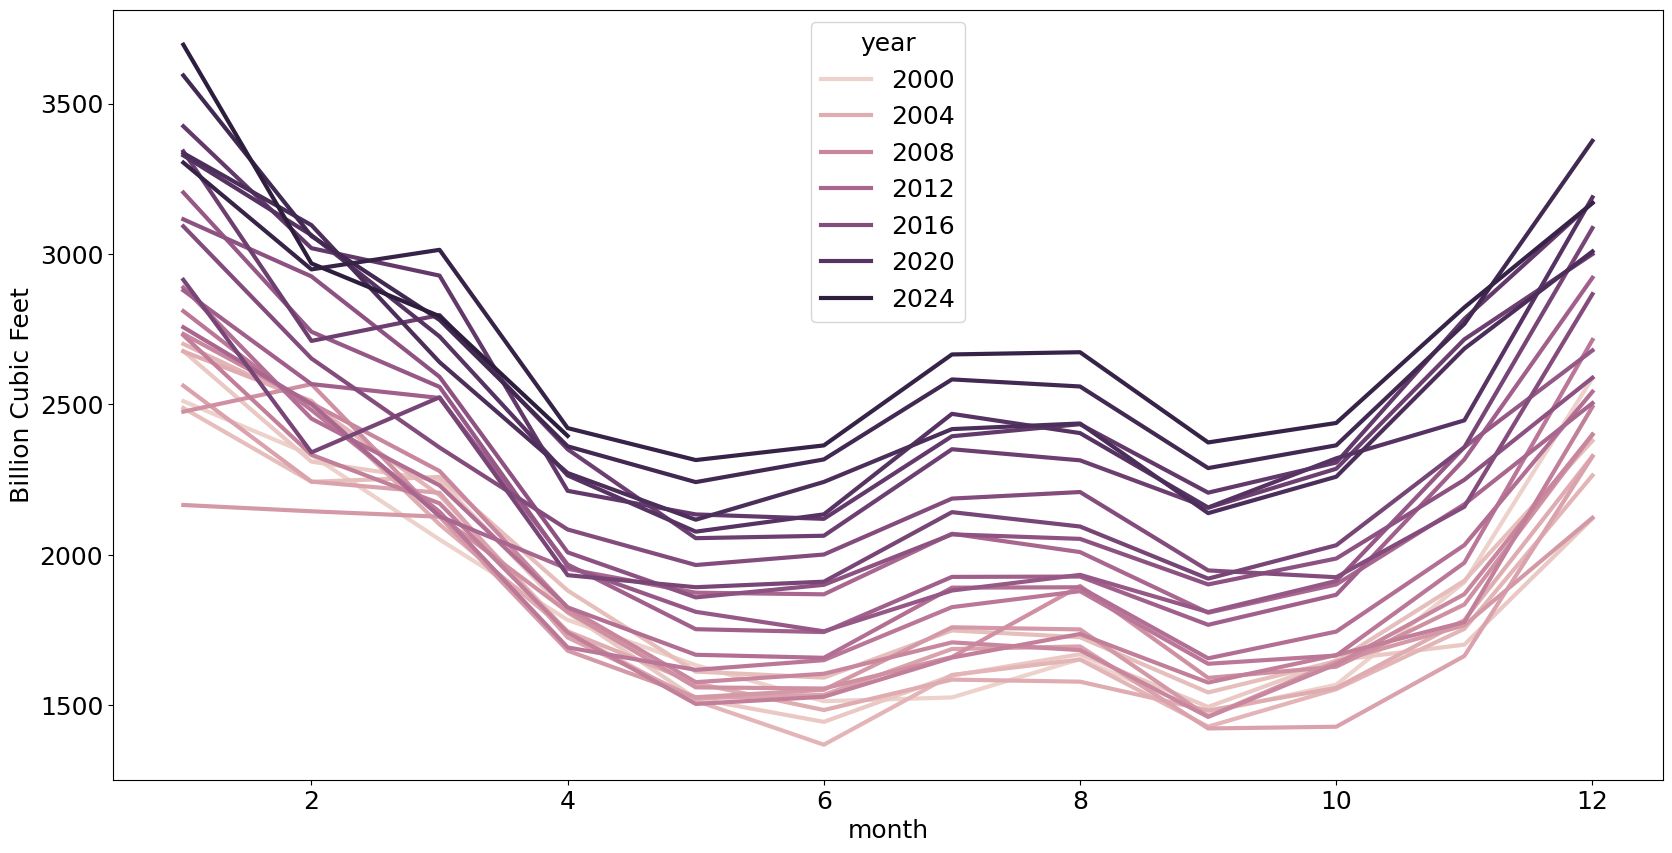

In [18]:
# Gráfico estacional
df['month'] = pd.to_datetime(df.index).month
df['year'] = pd.to_datetime(df.index).year

sns.lineplot(x='month', y='Billion Cubic Feet', hue='year', data=df)


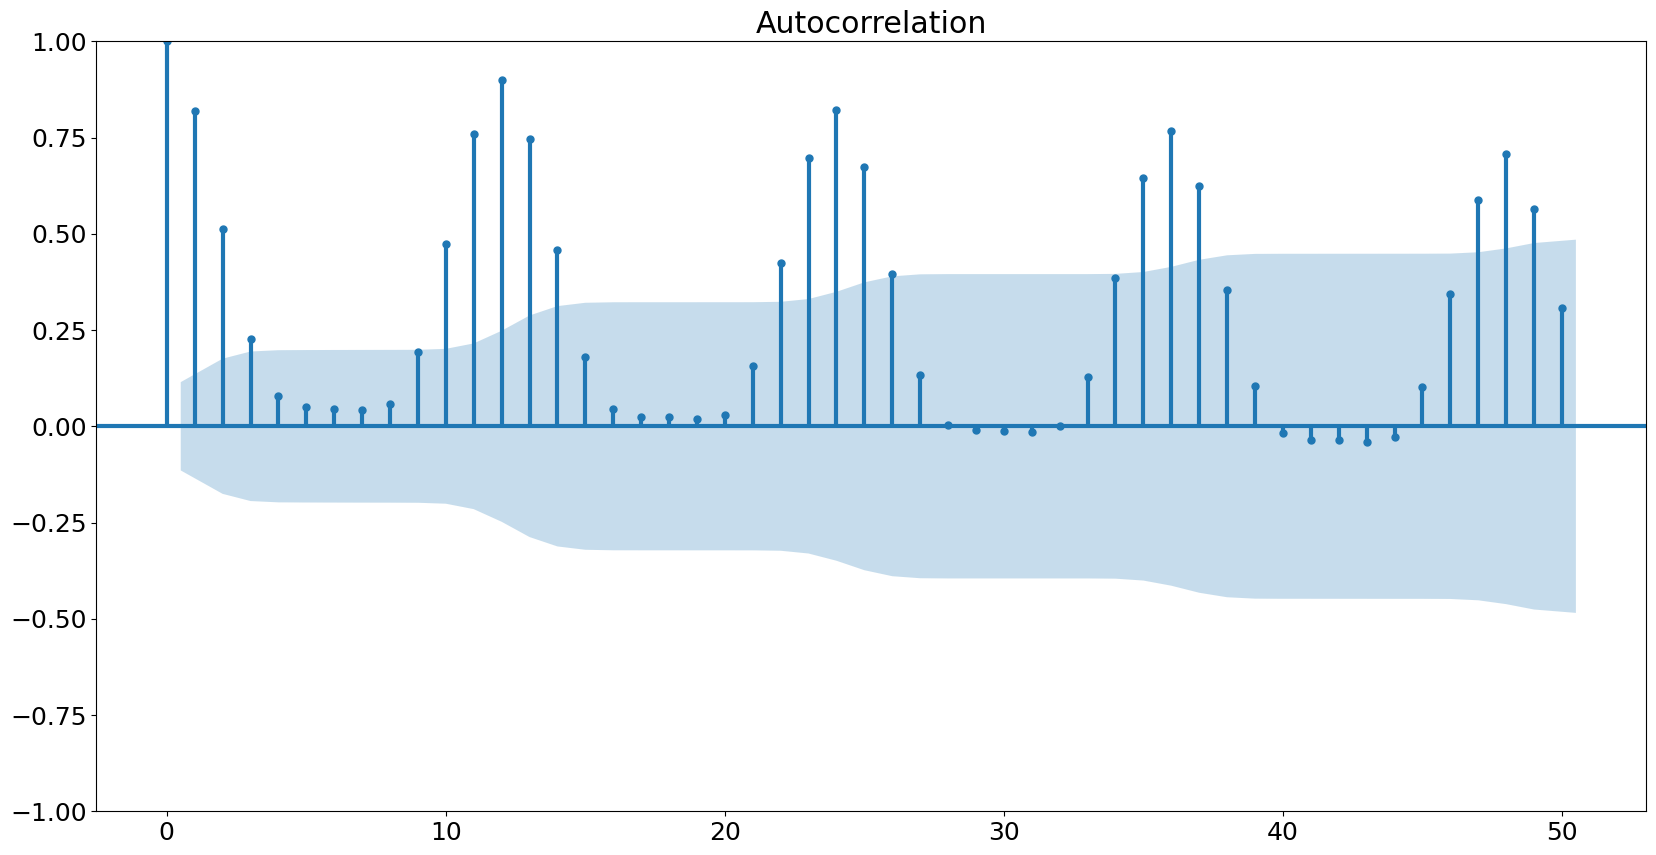

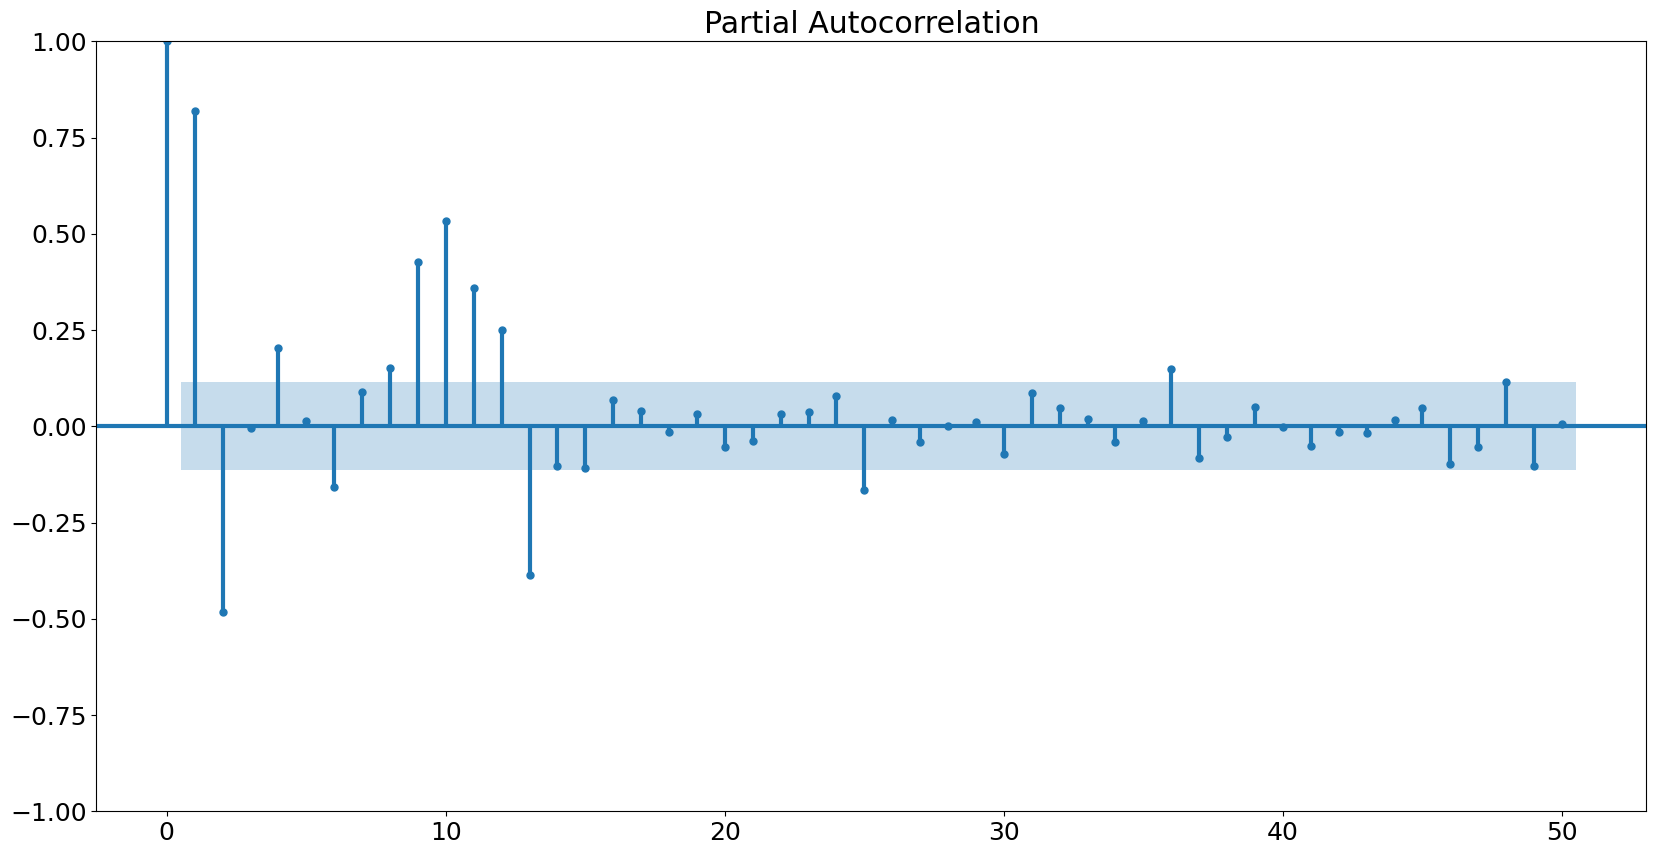

In [19]:
# ACF y PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y, lags=50)
plot_pacf(y, lags=50)
plt.show()

In [20]:
# Prueba de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(y)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# of Lags', '# of Obs'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Test Statistic            0.477091
p-value                   0.984160
# of Lags                14.000000
# of Obs                277.000000
Critical Value (1%)      -3.454180
Critical Value (5%)      -2.872031
Critical Value (10%)     -2.572360
dtype: float64


<Axes: title={'center': 'Differenced Data'}, xlabel='DATE'>

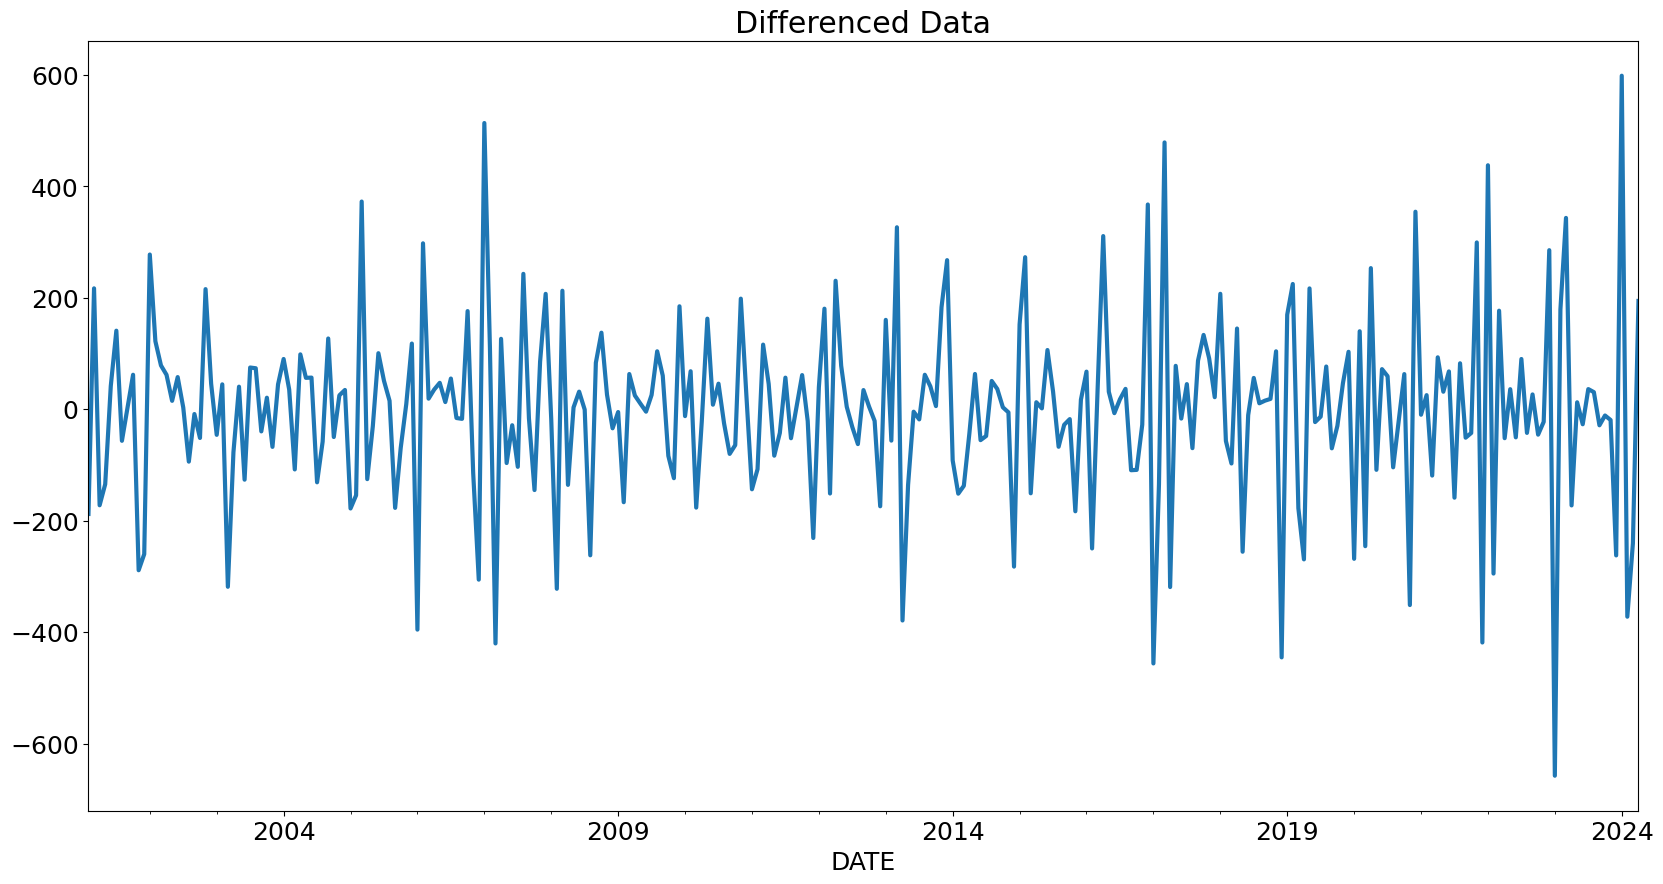

In [21]:
# Diferenciación para hacer los datos estacionarios
y_diff = y.diff().diff(12).dropna()
y_diff.plot(title='Differenced Data')

In [22]:
# Prueba de Dickey-Fuller en los datos diferenciados
dftest_diff = adfuller(y_diff)
dfoutput_diff = pd.Series(dftest_diff[0:4], index=['Test Statistic', 'p-value', '# of Lags', '# of Obs'])
for key, value in dftest_diff[4].items():
    dfoutput_diff['Critical Value (%s)' % key] = value
print(dfoutput_diff)

Test Statistic         -7.488732e+00
p-value                 4.565118e-11
# of Lags               1.400000e+01
# of Obs                2.640000e+02
Critical Value (1%)    -3.455365e+00
Critical Value (5%)    -2.872551e+00
Critical Value (10%)   -2.572638e+00
dtype: float64


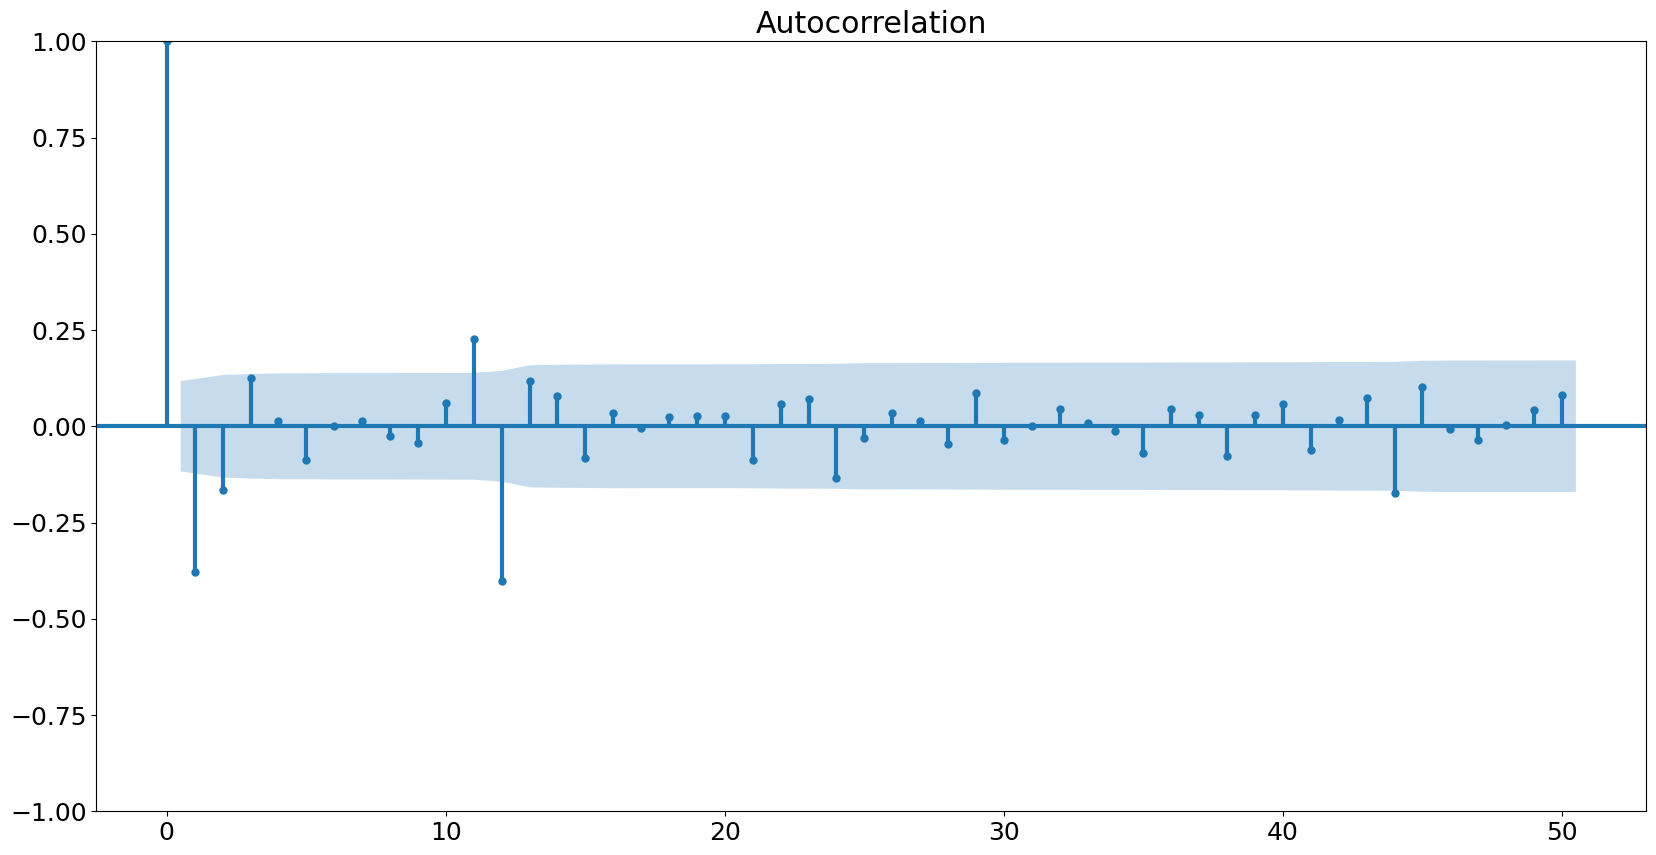

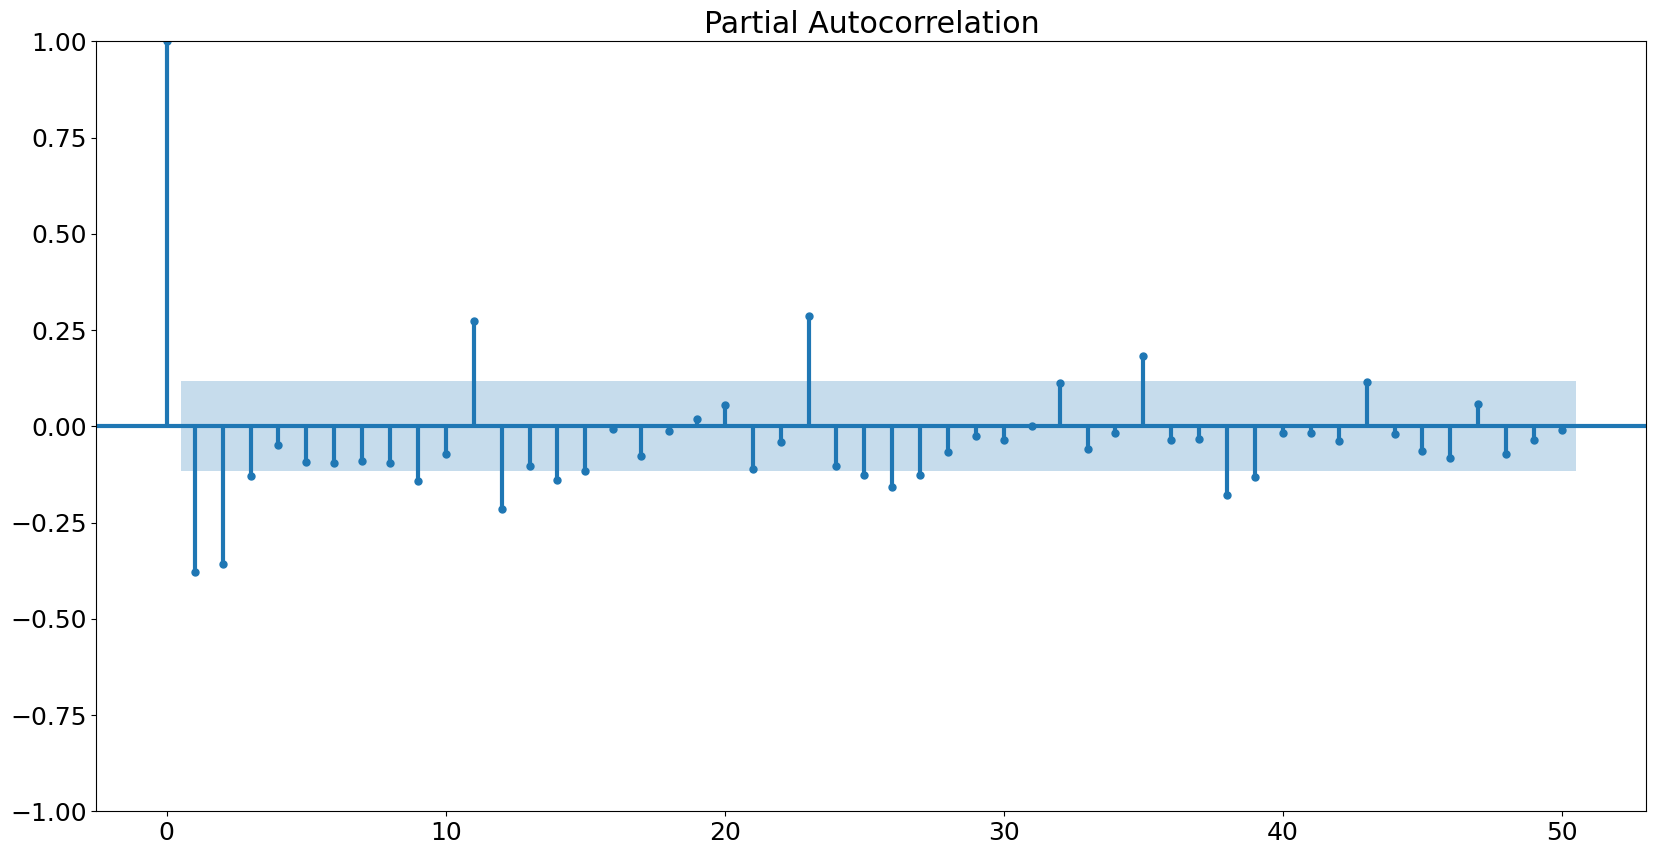

In [23]:
# Confirmar estacionariedad con ACF y PACF
plot_acf(y_diff, lags=50)
plot_pacf(y_diff, lags=50)
plt.show()

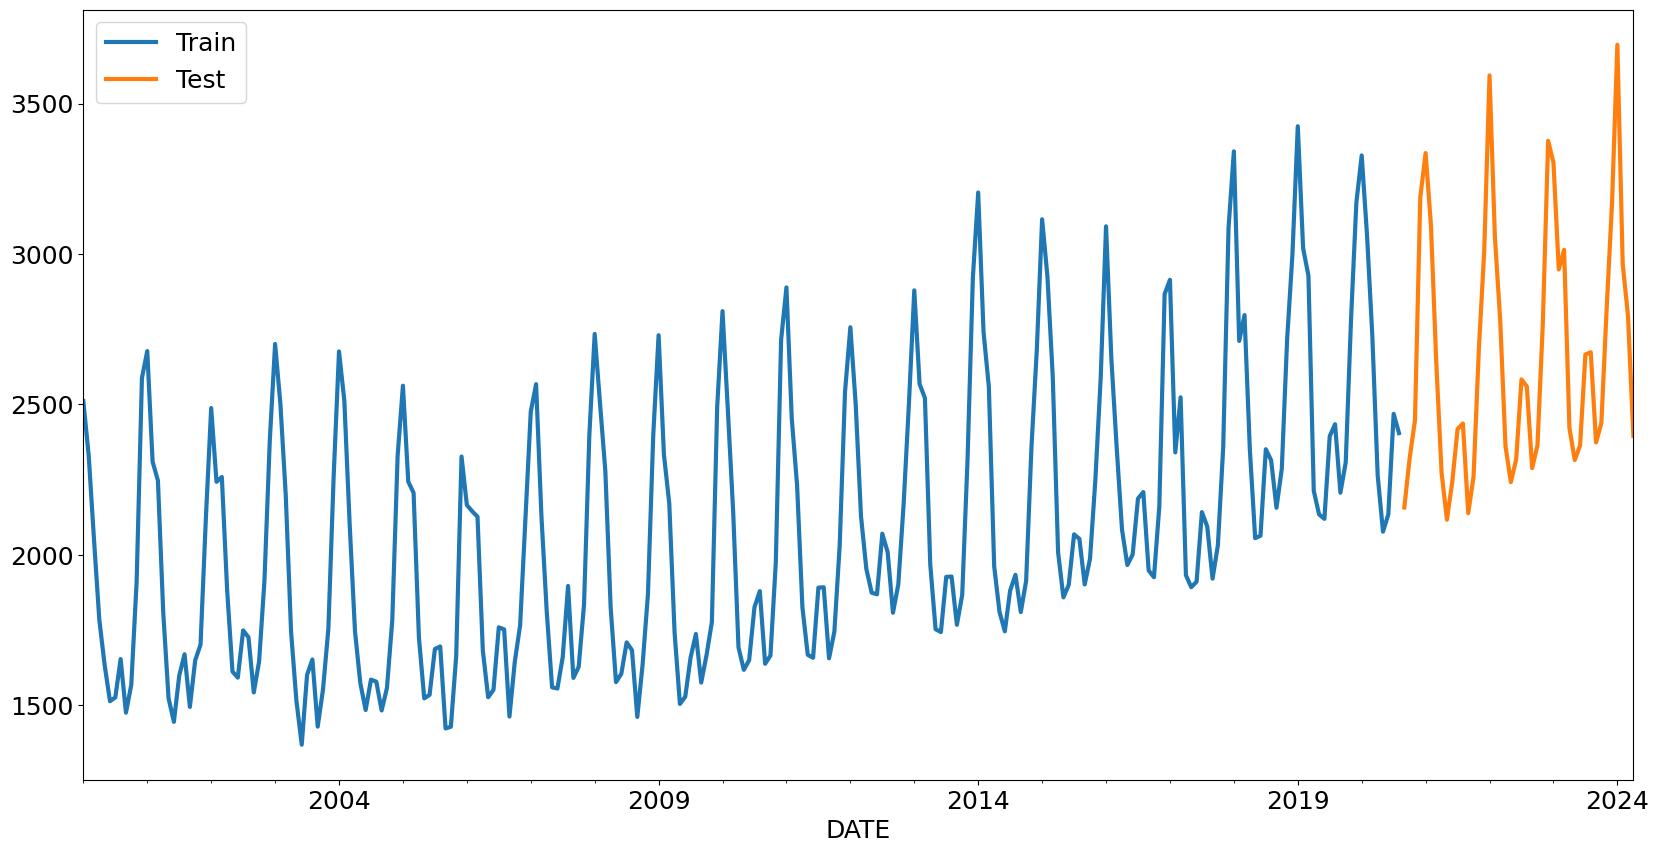

In [24]:
# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(y) * 0.85)
train, test = y[:train_size], y[train_size:]

train.plot(label='Train')
test.plot(label='Test')
plt.legend()
plt.show()

In [25]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00


In [26]:
# Encontrar los mejores parámetros para SARIMA
import pmdarima as pm

model = pm.auto_arima(y, d=1, D=1, m=12, trend='c', seasonal=True,
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=3503.808, Time=3.74 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3642.696, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3553.668, Time=1.84 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3434.667, Time=3.43 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3557.039, Time=1.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3436.511, Time=7.01 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3436.390, Time=9.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3517.476, Time=4.79 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=20.41 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3501.996, Time=0.63 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3423.106, Time=1.57 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=2.49 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=3425.049, Time=5.04 sec
 ARIMA(0,1,2)(0,1,2)[12]         

In [27]:
# Ajustar el modelo SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(0,1,2), seasonal_order=(0,1,1,12))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                   Billion Cubic Feet   No. Observations:                  248
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1433.013
Date:                              Sun, 08 Sep 2024   AIC                           2874.026
Time:                                      17:33:54   BIC                           2887.864
Sample:                                  01-01-2000   HQIC                          2879.605
                                       - 08-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4992      0.053     -9.350      0.000      -0.604      -0.395
ma.L2         -0.31

* Significant Coefficients: The model's moving average coefficients (ma.L1: -0.4992, ma.L2: -0.3118, ma.S.L12: -0.8100) are statistically significant, highlighting the impact of past errors and seasonality on current values.

* Model Diagnostics: The Ljung-Box test shows no significant autocorrelation, but the Jarque-Bera test indicates non-normal residuals, suggesting potential improvements in model fit despite strong overall performance.


In [28]:
# Calcular los residuos estandarizados manualmente
residuals = results.resid
standardized_residuals = residuals / np.std(residuals)

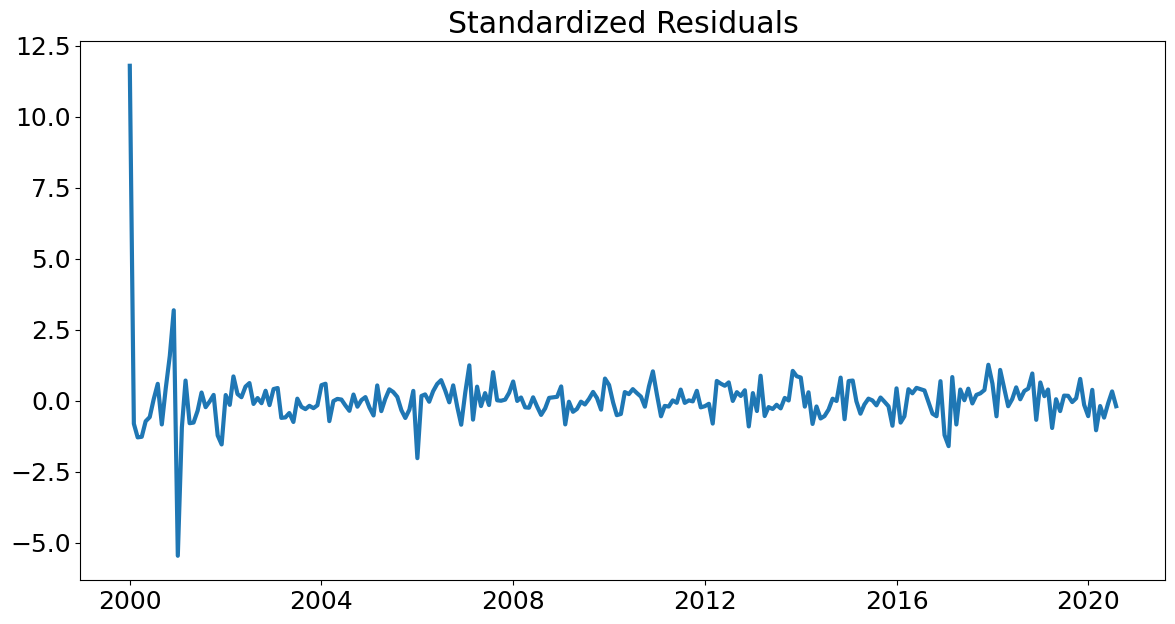

In [29]:
# Graficar los residuos estandarizados manualmente
plt.figure(figsize=(14, 7))
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')
plt.show()

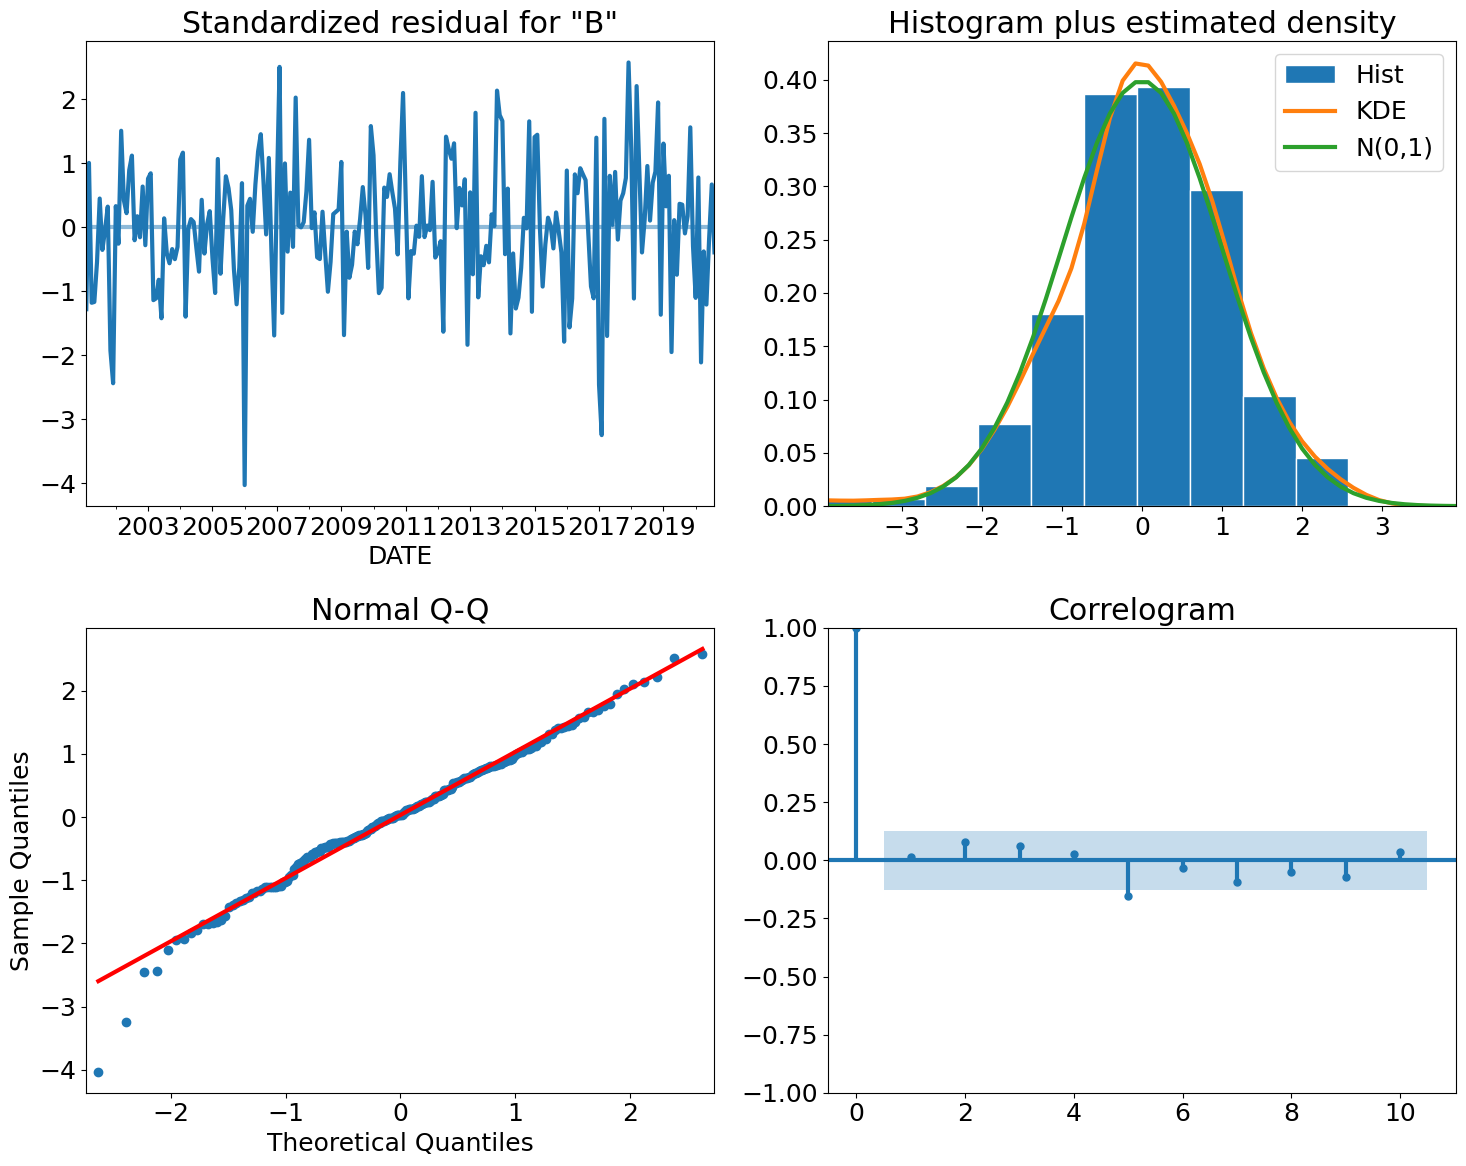

In [30]:
# Generar y mostrar los gráficos de diagnóstico
results.plot_diagnostics(figsize=(15, 12))
plt.tight_layout()  # Asegurarse de que los gráficos no se solapen
plt.show()

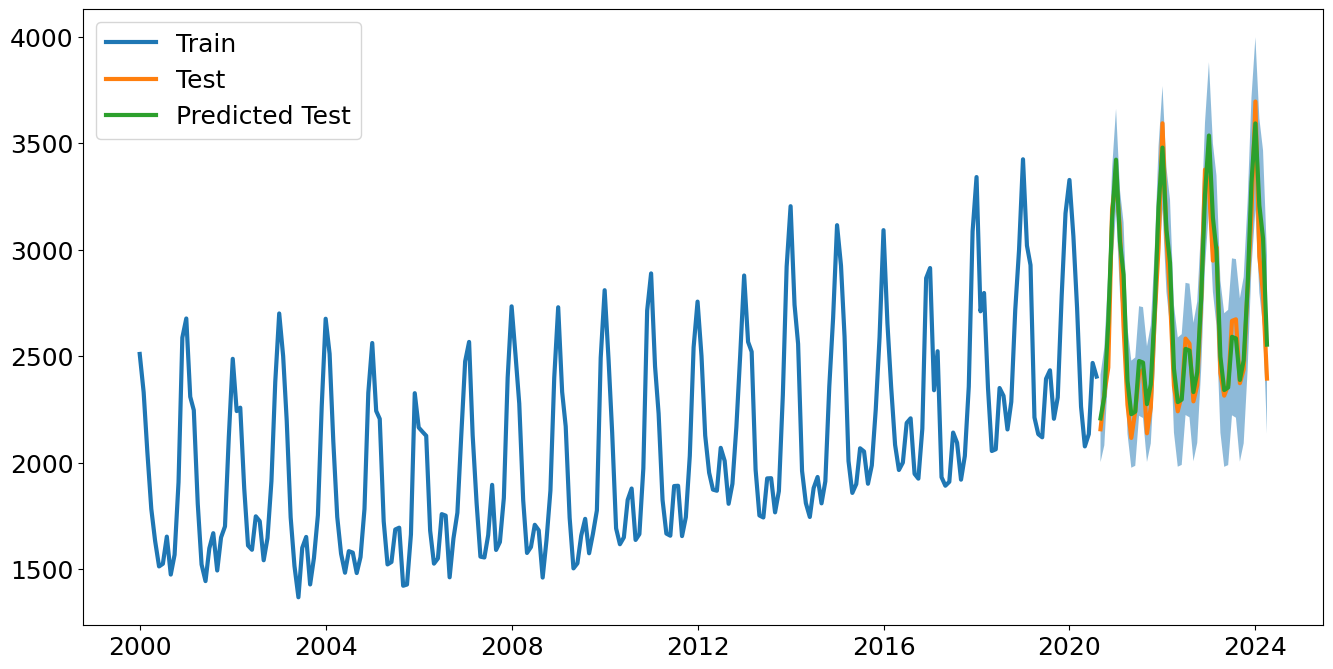

In [31]:
# Predecir el conjunto de prueba
forecast_object = results.get_forecast(steps=len(test))
mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = mean.index

plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(dates, mean, label='Predicted Test')
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.5)
plt.legend()
plt.show()

* Training and Test Split: The blue line represents the training data, capturing historical Billion Cubic Feet (BCF) consumption patterns, while the red line represents the actual test data, allowing for model validation.

In [32]:
# Medidas de precisión
def accuracy(y_test, y_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import r2_score

    R_sq = r2_score(y_test, y_pred)
    RMSE = rmse(y_test, y_pred)
    RMSPE = rmspe(y_test, y_pred)
    MAE = meanabs(y_test, y_pred)
    MSE = mse(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    print(f'R-SQ: {R_sq:.6f}  RMSE: {RMSE:.6f}  RMSPE: {RMSPE:.6f}  MAE: {MAE:.6f}  MSE: {MSE:.6f}  MAPE: {MAPE:.6f}')

accuracy(test, mean)

R-SQ: 0.920040  RMSE: 115.754154  RMSPE: 0.423599  MAE: 90.095289  MSE: 13399.024233  MAPE: 0.033349


* **R-SQ: 0.920040, RMSE: 115.754154, MAPE: 0.033349:** The high R-squared value indicates that 92% of the variability in BCF consumption is explained by the model, while the low RMSE and MAPE values suggest accurate predictions with an average error of 115.75 units and 3.33% respectively.

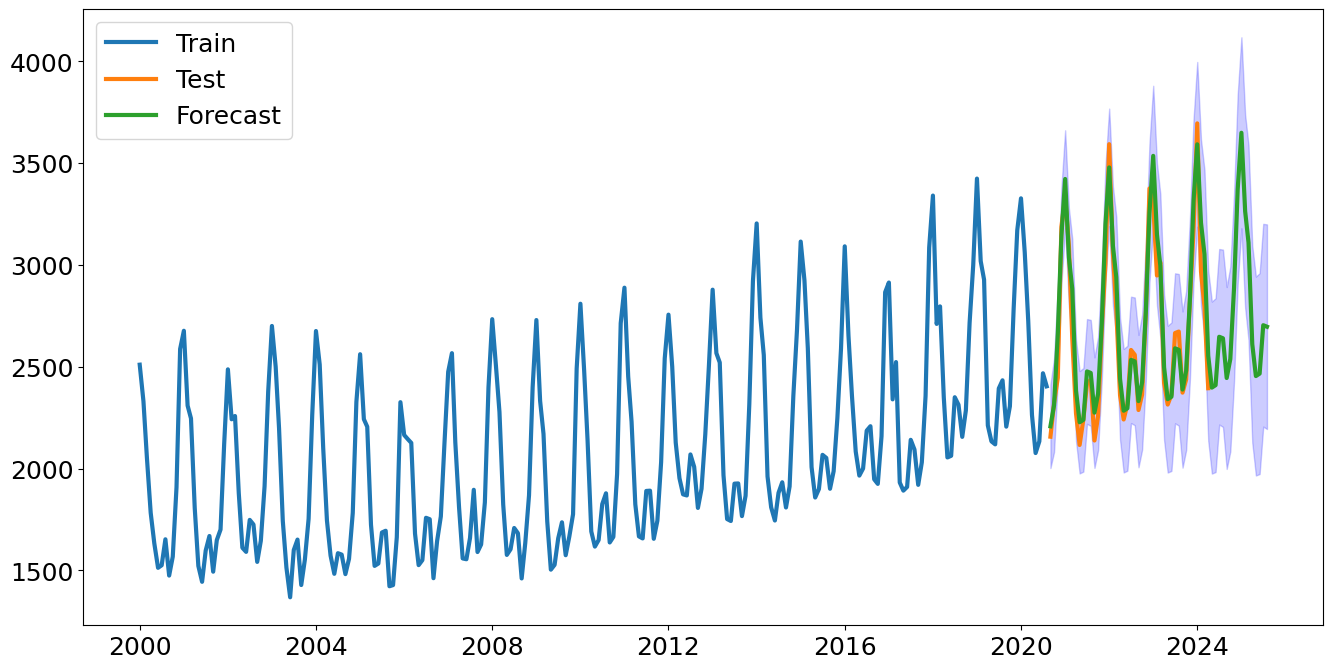

In [33]:
# Pronóstico futuro
forecast_future = results.get_forecast(steps=60)
mean_forecast = forecast_future.predicted_mean
conf_int_forecast = forecast_future.conf_int()

plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(mean_forecast.index, mean_forecast, label='Forecast')
plt.fill_between(mean_forecast.index, conf_int_forecast.iloc[:,0], conf_int_forecast.iloc[:,1], color='blue', alpha=0.2)
plt.legend()
plt.show()

* **Predicted Test Values:** The orange line indicates the SARIMA model's predictions for the test period, closely following the actual data, suggesting strong model performance.

* **Confidence Interval:** The shaded blue area around the predictions represents the 95% confidence interval, illustrating the uncertainty range within which the future values are expected to fall, providing a measure of prediction reliability.

###**SARIMA with Exogenous Variables (SARIMAX)**

SARIMAX incorporates external factors such as Price along with historical BCF data. This model allows for more accurate forecasts by including additional information but is more complex and sensitive to the quality of exogenous data.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from dateutil.relativedelta import relativedelta

# Cargar los datos
df = pd.read_csv('Final.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'
y = df['Billion Cubic Feet']
X = df[['Price']]  # Asegurarse de que X sea un DataFrame

In [35]:
# Ajustar el modelo SARIMAX
model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit = model.fit()

print(fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                 Billion Cubic Feet   No. Observations:                  292
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1701.750
Date:                            Sun, 08 Sep 2024   AIC                           3415.500
Time:                                    17:34:14   BIC                           3437.287
Sample:                                01-01-2000   HQIC                          3424.240
                                     - 04-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Price         16.4944      5.464      3.018      0.003       5.784      27.205
ar.L1          0.3495      0.070   

* **Significant Coefficients:** The coefficient for Price (16.4944) is statistically significant (p<0.01), indicating that Price is a meaningful predictor of Billion Cubic Feet consumption.


In [36]:
# Crear el rango de fechas para las predicciones futuras
date_range = pd.date_range(start=X.index[-1] + relativedelta(months=1), periods=24, freq='MS')

# Generar valores futuros para la variable exógena (asegúrate de que estos valores sean razonables)
X_fcast = pd.Series([2.39, 2.84, 2.34, 2.401, 2.901, 3.010, 2.901, 2.901, 3.309, 3.190, 3.102, 3.290,
                     3.295, 3.301, 3.340, 3.509, 3.519, 3.691, 3.901, 3.102, 3.701, 3.791, 3.120, 3.700], index=date_range)
X_fcast = X_fcast.to_frame(name='Price')


In [37]:
# Hacer la predicción
forecast_object = fit.get_forecast(steps=24, exog=X_fcast)
mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

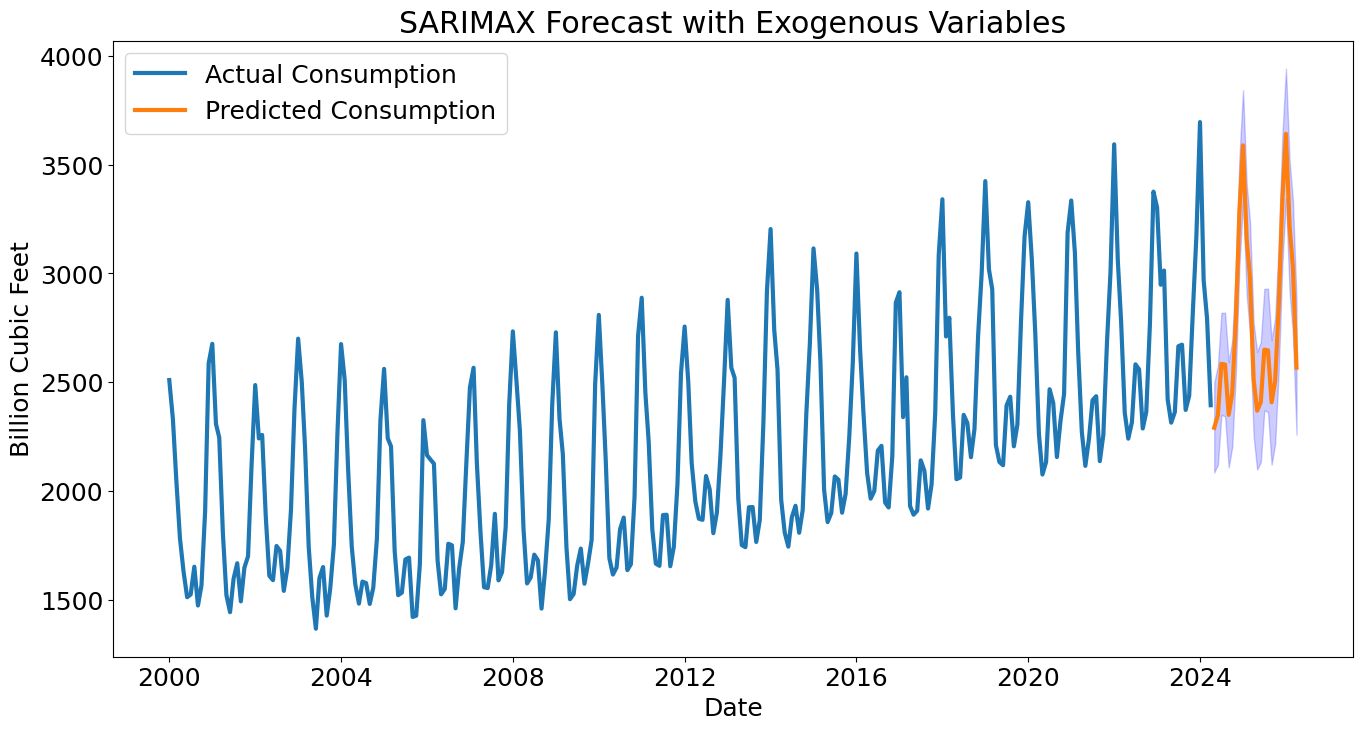

In [38]:
# Graficar los resultados
plt.figure(figsize=(16, 8))
plt.plot(y.index, y, label='Actual Consumption')
plt.plot(mean.index, mean, label='Predicted Consumption')
plt.fill_between(mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='blue', alpha=0.2)
plt.title('SARIMAX Forecast with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Billion Cubic Feet')
plt.legend()
plt.show()

* **Model Performance:** The model demonstrates good performance with an R^2 value of 0.889, suggesting that approximately 89% of the variance in the data is explained by the model.

* **Prediction Accuracy:** The model effectively captures the seasonality and trend in the historical data, as evidenced by the close alignment of the actual and forecasted values in the training period.

* **Confidence Intervals:** The shaded blue area around the forecast indicates the 95% confidence intervals, suggesting a reasonable level of certainty in the predictions, although the intervals widen slightly, reflecting increased uncertainty over time.

###**Conclusions**

* **Model Comparison:** Among the three models evaluated (Time Series Regression, SARIMA, and SARIMAX), the SARIMA model showed the highest accuracy with an R-Squared of 92%, compared to the SARIMAX model which had an R-Squared of 88%.

* **Time Series Regression Limitations:** The Time Series Regression model demonstrated significant limitations, with an R-Squared of only 11%, indicating it does not adequately capture the complexity and seasonality of natural gas consumption data.

* **Influence of Exogenous Variables:** While the SARIMAX model includes exogenous variables like Price, it did not outperform the SARIMA model, indicating that these variables may not significantly improve the forecast accuracy in this context.

* **Seasonality and Trends:** Both SARIMA and SARIMAX models effectively captured the seasonal patterns and long-term trends in natural gas consumption, demonstrating their suitability for time series data with such characteristics.

###**Recommendations**

* **Adopt SARIMA for Forecasting:** Given its higher accuracy, the SARIMA model should be used for future natural gas consumption forecasting.

* **Regular Model Updates:** Continuously update and re-evaluate the forecasting models with the latest data to maintain their accuracy and relevance, considering potential changes in market conditions and economic indicators.

* **Incorporate Additional Exogenous Variables:** Although SARIMAX did not outperform SARIMA in this analysis, it's worth exploring other potential exogenous variables such as weather patterns, industrial production indices, and policy changes to see if they can improve the model's predictive power.